In [3]:
import numpy as np
from matplotlib import pyplot as plt
import math
import scipy.stats as stats
import pandas as pd

In [ ]:
# KCl regression fitting

In [4]:
data_KCl = pd.read_csv("KCl.csv")
KCl_conc = data_KCl["KCl conc"]
KCl_cond = data_KCl["KCl cond"]
ndata = len(KCl_conc)

weight = [1/(KCl_conc[i]) for i in range(ndata)]
weight[0] = 0.000001

# evaluating the weight matrix
W = np.zeros((ndata, ndata))
for i in range(ndata):
    W[i, i] = weight[i]

KCl_conc_oh = [KCl_conc[i]**1.5 for i in range(ndata)]
KCl_conc_hf = [KCl_conc[i]**0.5 for i in range(ndata)]
KCl_conc_sq = [KCl_conc[i]**2 for i in range(ndata)]

print(f'KCl_conc: {KCl_conc}')
print(f'KCl_cond: {KCl_cond}')

KCl_conc: 0       0
1       2
2       4
3       6
4       8
5      10
6      20
7      30
8      40
9      50
10     60
11     70
12     80
13     90
14    100
Name: KCl conc, dtype: int64
KCl_cond: 0         0.88
1       272.04
2       530.48
3       794.86
4      1055.10
5      1286.50
6      2601.90
7      3850.10
8      5090.60
9      6268.60
10     7488.80
11     8620.30
12     9866.10
13    11024.00
14    11944.00
Name: KCl cond, dtype: float64


C:\Users\lilon\AppData\Local\Temp\ipykernel_24320\575659620.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  weight = [1/(KCl_conc[i]) for i in range(ndata)]


In [5]:
X = np.ones((ndata, 5))
X[:, 1] = KCl_conc
X[:, 2] = KCl_conc_hf
X[:, 3] = KCl_conc_oh
X[:, 4] = KCl_conc_sq

print(X)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [1.00000000e+00 2.00000000e+00 1.41421356e+00 2.82842712e+00
  4.00000000e+00]
 [1.00000000e+00 4.00000000e+00 2.00000000e+00 8.00000000e+00
  1.60000000e+01]
 [1.00000000e+00 6.00000000e+00 2.44948974e+00 1.46969385e+01
  3.60000000e+01]
 [1.00000000e+00 8.00000000e+00 2.82842712e+00 2.26274170e+01
  6.40000000e+01]
 [1.00000000e+00 1.00000000e+01 3.16227766e+00 3.16227766e+01
  1.00000000e+02]
 [1.00000000e+00 2.00000000e+01 4.47213595e+00 8.94427191e+01
  4.00000000e+02]
 [1.00000000e+00 3.00000000e+01 5.47722558e+00 1.64316767e+02
  9.00000000e+02]
 [1.00000000e+00 4.00000000e+01 6.32455532e+00 2.52982213e+02
  1.60000000e+03]
 [1.00000000e+00 5.00000000e+01 7.07106781e+00 3.53553391e+02
  2.50000000e+03]
 [1.00000000e+00 6.00000000e+01 7.74596669e+00 4.64758002e+02
  3.60000000e+03]
 [1.00000000e+00 7.00000000e+01 8.36660027e+00 5.85662019e+02
  4.90000000e+03]
 [1.00000000e+00 8.00000000e+01 8.944271

In [6]:
A = np.matmul(np.transpose(X), X)
XXinv = np.linalg.inv(A)
print(XXinv)

[[ 9.58784260e-01  2.71717977e-01 -8.97916907e-01 -3.27500295e-02
   1.36397648e-03]
 [ 2.71717977e-01  3.28831882e-01 -7.00144025e-01 -5.06218143e-02
   2.46373475e-03]
 [-8.97916907e-01 -7.00144025e-01  1.67507990e+00  1.01517251e-01
  -4.76251501e-03]
 [-3.27500295e-02 -5.06218143e-02  1.01517251e-01  8.05025967e-03
  -4.00247738e-04]
 [ 1.36397648e-03  2.46373475e-03 -4.76251501e-03 -4.00247738e-04
   2.01982831e-05]]


In [7]:
B = np.matmul(np.transpose(X), KCl_cond)
beta_hat = np.matmul(XXinv, B)
print(f"Beta hat is:{beta_hat}")

Beta hat is:[ -4.59905593 109.57494965  39.54802957   3.71838421  -0.30562975]


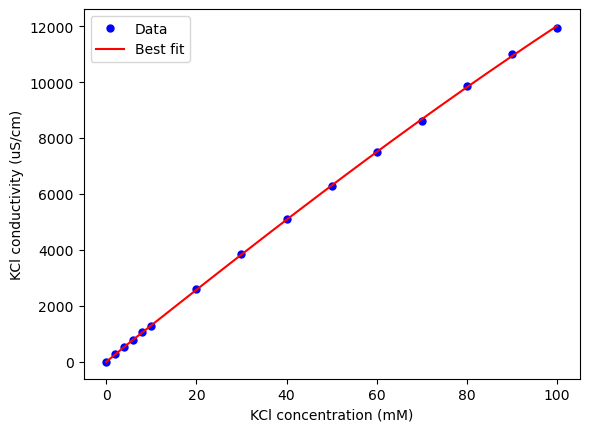

In [8]:
# evaluating predictions
KCl_conc_plot = np.linspace(0, 100, 20)
KCl_conc_plot_oh = [KCl_conc_plot[i]**1.5 for i in range(len(KCl_conc_plot))]
KCl_conc_plot_hf = [KCl_conc_plot[i]**0.5 for i in range(len(KCl_conc_plot))]
KCl_conc_plot_sq = [KCl_conc_plot[i]**2 for i in range(len(KCl_conc_plot))]

X_plot = np.ones((len(KCl_conc_plot), 5))
X_plot[:, 1] = KCl_conc_plot
X_plot[:, 2] = KCl_conc_plot_hf
X_plot[:, 3] = KCl_conc_plot_oh
X_plot[:, 4] = KCl_conc_plot_sq

KCl_cond_plot = np.matmul(beta_hat, np.transpose(X_plot))

plt.plot(KCl_conc, KCl_cond, "b.", markersize=10, label="Data")
plt.plot(KCl_conc_plot, KCl_cond_plot, "r-", label="Best fit")
plt.xlabel("KCl concentration (mM)")
plt.ylabel("KCl conductivity (uS/cm)")
plt.legend()
plt.show()   

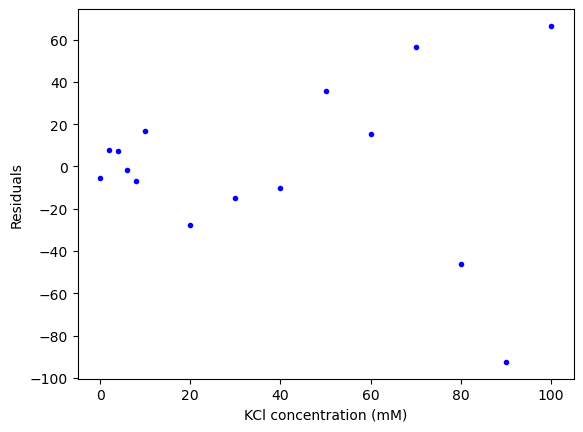

In [9]:
# calculating residuals
KCl_cond_pred = np.matmul(beta_hat, np.transpose(X))

e = [KCl_cond_pred[i] - KCl_cond[i] for i in range(ndata)]

plt.plot(KCl_conc, e, "b.")
plt.xlabel("KCl concentration (mM)")
plt.ylabel("Residuals")
plt.show()

In [10]:
# variance of residuals
sse = sum(e[i]**2 for i in range(ndata))
var = sse/(ndata - 5)

# AIC evaluation
MLE_sigma_sq = sse/ndata
k = 6

AIC = 2*k + ndata*math.log(MLE_sigma_sq) + ndata*math.log(2*math.pi) + (1/MLE_sigma_sq)*sse
AICc = AIC + ((2*(k**2) + 2*k)/(ndata - k - 1))

print(f"AICc value is: {AICc}")

# covariance matrix of fitted parameters
Sigma_beta = var*XXinv
print(Sigma_beta)

AICc value is: 173.99754407266383
[[ 2.04946717e+03  5.80815827e+02 -1.91935902e+03 -7.00054361e+01
   2.91559336e+00]
 [ 5.80815827e+02  7.02900719e+02 -1.49660591e+03 -1.08207603e+02
   5.26640213e+00]
 [-1.91935902e+03 -1.49660591e+03  3.58059826e+03  2.17000093e+02
  -1.01802027e+01]
 [-7.00054361e+01 -1.08207603e+02  2.17000093e+02  1.72079826e+01
  -8.55557013e-01]
 [ 2.91559336e+00  5.26640213e+00 -1.01802027e+01 -8.55557013e-01
   4.31752165e-02]]


In [11]:
var_list = [Sigma_beta[i, i] for i in range(len(Sigma_beta))]
print(f"Variance is:{var_list}")
sd_list = [np.sqrt(var_list[i]) for i in range(len(var_list))]

corr = np.zeros((len(var_list), len(var_list)))
for i in range(len(var_list)):
    for j in range(len(var_list)):
        corr[i, j] = Sigma_beta[i, j]/(sd_list[i]*sd_list[j])
print(corr)

Variance is:[2049.467167927555, 702.9007188968801, 3580.598262905452, 17.207982615179112, 0.043175216548537]
[[ 1.          0.4839171  -0.7085295  -0.37277459  0.30994826]
 [ 0.4839171   1.         -0.94337131 -0.98388832  0.9559821 ]
 [-0.7085295  -0.94337131  1.          0.87421276 -0.81876895]
 [-0.37277459 -0.98388832  0.87421276  1.         -0.99258273]
 [ 0.30994826  0.9559821  -0.81876895 -0.99258273  1.        ]]


In [12]:
# r squared evaluation
KCl_cond_mean = np.mean(KCl_cond)
sd = [KCl_cond[i] - KCl_cond_mean for i in range(ndata)]
tss = sum(sd[i]**2 for i in range(ndata))
r_squared = 1 - (sse/tss)
print(r_squared)

0.9999142568384536


In [13]:
# transforming predictor variables by the weights
X_tr = np.matmul(np.transpose(X), W)

# transforming conductivity by the weights
KCl_cond_tr = np.matmul(W, KCl_cond)
print(f"Weighted KCl_cond is: {KCl_cond_tr}")

F = np.matmul(X_tr, X)
XXinv_tr = np.linalg.inv(F)

R = np.matmul(np.transpose(X), KCl_cond_tr)

# parameter vector
beta_hat2 = np.matmul(XXinv_tr, R)
print(f"The parameters are: {beta_hat2}")

Weighted KCl_cond is: [8.80000000e-07 1.36020000e+02 1.32620000e+02 1.32476667e+02
 1.31887500e+02 1.28650000e+02 1.30095000e+02 1.28336667e+02
 1.27265000e+02 1.25372000e+02 1.24813333e+02 1.23147143e+02
 1.23326250e+02 1.22488889e+02 1.19440000e+02]
The parameters are: [ -3.89579193 120.38669661  21.53050987   1.85532363  -0.20842562]


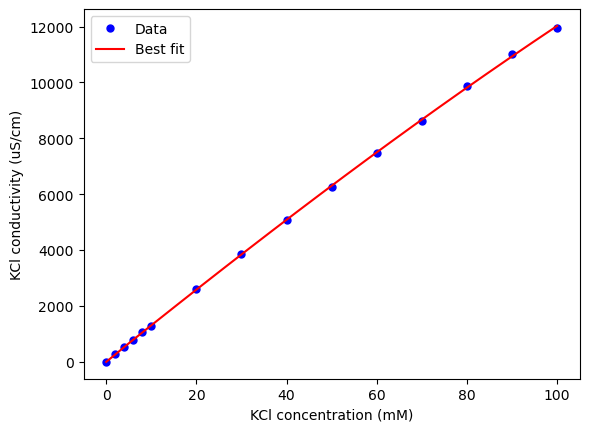

In [14]:
# evaluating predictions
KCl_conc_plot = np.linspace(0, 100, 20)
KCl_conc_plot_oh = [KCl_conc_plot[i]**1.5 for i in range(len(KCl_conc_plot))]
KCl_conc_plot_hf = [KCl_conc_plot[i]**0.5 for i in range(len(KCl_conc_plot))]
KCl_conc_plot_sq = [KCl_conc_plot[i]**2 for i in range(len(KCl_conc_plot))]

X_plot = np.ones((len(KCl_conc_plot), 5))
X_plot[:, 1] = KCl_conc_plot
X_plot[:, 2] = KCl_conc_plot_hf
X_plot[:, 3] = KCl_conc_plot_oh
X_plot[:, 4] = KCl_conc_plot_sq

KCl_cond_plot = np.matmul(beta_hat2, np.transpose(X_plot))

plt.plot(KCl_conc, KCl_cond, "b.", markersize=10, label="Data")
plt.plot(KCl_conc_plot, KCl_cond_plot, "r-", label="Best fit")
plt.xlabel("KCl concentration (mM)")
plt.ylabel("KCl conductivity (uS/cm)")
plt.legend()
plt.show()

Predicted weighted KCl_cond is: [-3.89579193e-06  1.35870143e+02  1.33054948e+02  1.31821234e+02
  1.31092150e+02  1.30588455e+02  1.29135023e+02  1.28097010e+02
  1.27090646e+02  1.26051493e+02  1.24967081e+02  1.23837388e+02
  1.22665653e+02  1.21455765e+02  1.20211464e+02]


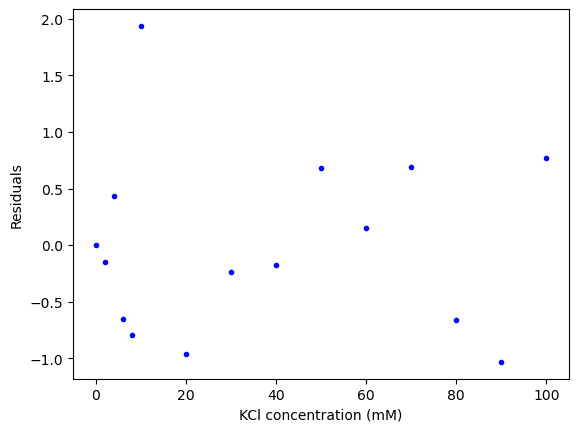

In [15]:
# evaluating predicted conductivity
KCl_cond_pred_tr = np.matmul(beta_hat2, X_tr)
print(f"Predicted weighted KCl_cond is: {KCl_cond_pred_tr}")

# calculating conductivity residuals
e = [KCl_cond_pred_tr[i] - KCl_cond_tr[i] for i in range(ndata)]

# plotting residuals
plt.plot(KCl_conc, e, "b.")
plt.xlabel("KCl concentration (mM)")
plt.ylabel("Residuals")
plt.show()

In [ ]:
# NdCl3 fitting

In [50]:
data_NdCl3 = pd.read_csv("NdCl3.csv")
NdCl3_conc = data_NdCl3["NdCl3 conc"]
NdCl3_cond = data_NdCl3["NdCl3 cond"]
ndata = len(NdCl3_conc)
NdCl3_conc_oh = [NdCl3_conc[i]**1.5 for i in range(ndata)]
NdCl3_conc_sq = [NdCl3_conc[i]**2 for i in range(ndata)]
print(data_NdCl3)

    NdCl3 conc  NdCl3 cond
0            0        0.90
1            2      678.27
2            4     1242.90
3            6     1849.80
4            8     2420.50
5           10     2965.90
6           20     5579.60
7           30     8140.10
8           40    10551.00
9           50    12797.00
10          60    15116.00
11          70    17432.00
12          80    19684.00
13          90    21888.00
14         100    24068.00


In [51]:
X = np.ones((ndata, 4))
X[:, 1] = NdCl3_conc
X[:, 2] = NdCl3_conc_oh
X[:, 3] = NdCl3_conc_sq
print(X)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.00000000e+00 2.82842712e+00 4.00000000e+00]
 [1.00000000e+00 4.00000000e+00 8.00000000e+00 1.60000000e+01]
 [1.00000000e+00 6.00000000e+00 1.46969385e+01 3.60000000e+01]
 [1.00000000e+00 8.00000000e+00 2.26274170e+01 6.40000000e+01]
 [1.00000000e+00 1.00000000e+01 3.16227766e+01 1.00000000e+02]
 [1.00000000e+00 2.00000000e+01 8.94427191e+01 4.00000000e+02]
 [1.00000000e+00 3.00000000e+01 1.64316767e+02 9.00000000e+02]
 [1.00000000e+00 4.00000000e+01 2.52982213e+02 1.60000000e+03]
 [1.00000000e+00 5.00000000e+01 3.53553391e+02 2.50000000e+03]
 [1.00000000e+00 6.00000000e+01 4.64758002e+02 3.60000000e+03]
 [1.00000000e+00 7.00000000e+01 5.85662019e+02 4.90000000e+03]
 [1.00000000e+00 8.00000000e+01 7.15541753e+02 6.40000000e+03]
 [1.00000000e+00 9.00000000e+01 8.53814968e+02 8.10000000e+03]
 [1.00000000e+00 1.00000000e+02 1.00000000e+03 1.00000000e+04]]


In [52]:
A = np.matmul(np.transpose(X), X)
XXinv = np.linalg.inv(A)
print(XXinv)

[[ 4.77461087e-01 -1.03590185e-01  2.16677068e-02 -1.18894219e-03]
 [-1.03590185e-01  3.61881362e-02 -8.18998947e-03  4.73115412e-04]
 [ 2.16677068e-02 -8.18998947e-03  1.89786520e-03 -1.11618262e-04]
 [-1.18894219e-03  4.73115412e-04 -1.11618262e-04  6.65770555e-06]]


In [53]:
B = np.matmul(np.transpose(X), NdCl3_cond)
beta_hat = np.matmul(XXinv, B)
print(f"Beta hat is:{beta_hat}")

Beta hat is:[ 24.14910779 336.90419182 -15.52084737   0.59008388]


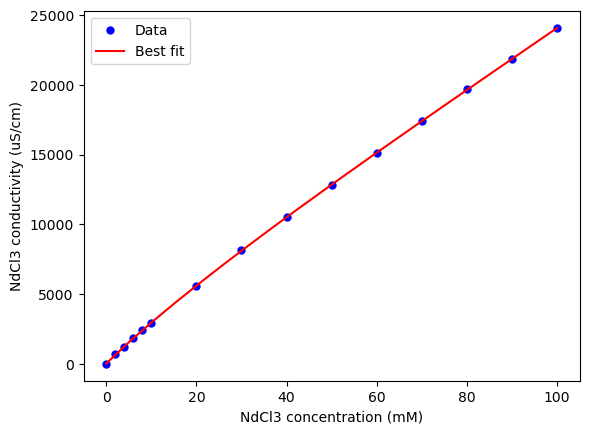

In [54]:
# evaluating predictions
NdCl3_conc_plot = np.linspace(0, 100, 20)
NdCl3_conc_plot_oh = [NdCl3_conc_plot[i]**1.5 for i in range(len(NdCl3_conc_plot))]
NdCl3_conc_plot_sq = [NdCl3_conc_plot[i]**2 for i in range(len(NdCl3_conc_plot))]
X_plot = np.ones((len(NdCl3_conc_plot), 4))
X_plot[:, 1] = NdCl3_conc_plot
X_plot[:, 2] = NdCl3_conc_plot_oh
X_plot[:, 3] = NdCl3_conc_plot_sq
NdCl3_cond_plot = np.matmul(beta_hat, np.transpose(X_plot))

plt.plot(NdCl3_conc, NdCl3_cond, "b.", markersize=10, label="Data")
plt.plot(NdCl3_conc_plot, NdCl3_cond_plot, "r-", label="Best fit")
plt.xlabel("NdCl3 concentration (mM)")
plt.ylabel("NdCl3 conductivity (uS/cm)")
plt.legend()
plt.show()

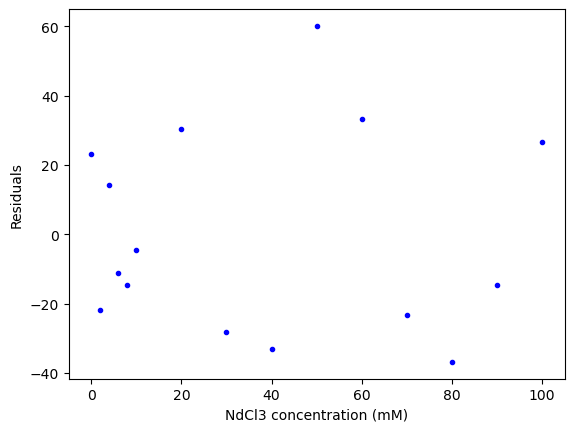

In [55]:
# calculating residuals
NdCl3_cond_pred = np.matmul(beta_hat, np.transpose(X))
e = [NdCl3_cond_pred[i] - NdCl3_cond[i] for i in range(ndata)]

plt.plot(NdCl3_conc, e, "b.")
plt.xlabel("NdCl3 concentration (mM)")
plt.ylabel("Residuals")
plt.show()

In [56]:
# variance of residuals
se = sum(e[i]**2 for i in range(ndata))/(ndata - 4)

# covariance matrix of fitted parameters
Sigma_beta = se*XXinv
print(Sigma_beta)

[[ 5.17041768e+02 -1.12177628e+02  2.34639214e+01 -1.28750340e+00]
 [-1.12177628e+02  3.91880688e+01 -8.86892513e+00  5.12335844e-01]
 [ 2.34639214e+01 -8.86892513e+00  2.05519487e+00 -1.20871219e-01]
 [-1.28750340e+00  5.12335844e-01 -1.20871219e-01  7.20961758e-03]]


In [57]:
var_list = [Sigma_beta[i, i] for i in range(len(Sigma_beta))]
print(f"Variance is:{var_list}")
sd_list = [np.sqrt(var_list[i]) for i in range(len(var_list))]

corr = np.zeros((len(var_list), len(var_list)))
for i in range(len(var_list)):
    for j in range(len(var_list)):
        corr[i, j] = Sigma_beta[i, j]/(sd_list[i]*sd_list[j])
print(corr)

Variance is:[517.0417675185143, 39.18806881175481, 2.0551948714529904, 0.007209617581224366]
[[ 1.         -0.78807311  0.71979907 -0.666852  ]
 [-0.78807311  1.         -0.98825166  0.96387717]
 [ 0.71979907 -0.98825166  1.         -0.9929795 ]
 [-0.666852    0.96387717 -0.9929795   1.        ]]


In [58]:
# r squared evaluation
sse = sum(e[i]**2 for i in range(ndata))
NdCl3_cond_mean = np.mean(NdCl3_cond)
sd = [NdCl3_cond[i] - NdCl3_cond_mean for i in range(ndata)]
tss = sum(sd[i]**2 for i in range(ndata))
r_squared = 1 - (sse/tss)
print(f"r-squared value is: {r_squared}")

r-squared value is: 0.9999878497735853


In [ ]:
# KCl & NdCl3 salts

In [155]:
data = pd.read_csv("KCl&NdCl3.csv")
KCl_conc = data["KCl conc"]
NdCl3_conc = data["NdCl3 conc"]
cond = data["Bulk cond"]
ndata_train = len(KCl_conc)

KCl_conc_train = KCl_conc
NdCl3_conc_train = NdCl3_conc
cond_train = cond

KCl_conc_oh = [KCl_conc_train[i]**1.5 for i in range(ndata_train)]
NdCl3_conc_oh = [NdCl3_conc_train[i]**1.5 for i in range(ndata_train)]

KCl_conc_hf = [KCl_conc_train[i]**0.5 for i in range(ndata_train)]
NdCl3_conc_hf = [NdCl3_conc_train[i]**0.5 for i in range(ndata_train)]

KCl_conc_sq = [KCl_conc_train[i]**2 for i in range(ndata_train)]
NdCl3_conc_sq = [NdCl3_conc_train[i]**2 for i in range(ndata_train)]

sum_conc = KCl_conc_train + NdCl3_conc_train
sum_sq = [sum_conc[i]**2 for i in range(ndata_train)]
prdt = [KCl_conc_train[i]*NdCl3_conc_train[i] for i in range(ndata_train)]
print(data)

    KCl conc  NdCl3 conc  Bulk cond
0       0.00        0.00       0.55
1       1.11        2.22     893.61
2       2.00        4.00    1545.90
3       4.00        8.00    2959.10
4       6.06       12.12    4359.90
..       ...         ...        ...
70      0.00       60.00   15116.00
71      0.00       70.00   17432.00
72      0.00       80.00   19684.00
73      0.00       90.00   21888.00
74      0.00      100.00   24068.00

[75 rows x 3 columns]


In [135]:
X = np.ones((ndata_train, 6))
X[:, 1] = KCl_conc_train
X[:, 2] = NdCl3_conc_train
X[:, 3] = KCl_conc_hf
X[:, 4] = NdCl3_conc_hf
X[:, 5] = sum_sq
# X[:, 1] = KCl_conc_train
# X[:, 2] = NdCl3_conc_train
# X[:, 3] = KCl_conc_hf
# X[:, 4] = NdCl3_conc_hf
# X[:, 5] = KCl_conc_oh
# X[:, 6] = NdCl3_conc_oh
# X[:, 7] = KCl_conc_sq
# X[:, 8] = NdCl3_conc_sq
# X[:, 1] = KCl_conc_train
# X[:, 2] = NdCl3_conc_train
# X[:, 3] = KCl_conc_oh
# X[:, 4] = NdCl3_conc_oh
# X[:, 5] = KCl_conc_sq
# X[:, 6] = NdCl3_conc_sq
# X[:, 7] = prdt
print(X)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.11000000e+00 2.22000000e+00 1.05356538e+00
  1.48996644e+00 1.10889000e+01]
 [1.00000000e+00 2.00000000e+00 4.00000000e+00 1.41421356e+00
  2.00000000e+00 3.60000000e+01]
 [1.00000000e+00 4.00000000e+00 8.00000000e+00 2.00000000e+00
  2.82842712e+00 1.44000000e+02]
 [1.00000000e+00 6.06000000e+00 1.21200000e+01 2.46170673e+00
  3.48137904e+00 3.30512400e+02]
 [1.00000000e+00 8.00000000e+00 1.60000000e+01 2.82842712e+00
  4.00000000e+00 5.76000000e+02]
 [1.00000000e+00 1.00000000e+01 2.00000000e+01 3.16227766e+00
  4.47213595e+00 9.00000000e+02]
 [1.00000000e+00 1.50200000e+01 3.00300000e+01 3.87556448e+00
  5.47996350e+00 2.02950250e+03]
 [1.00000000e+00 2.00000000e+01 4.00000000e+01 4.47213595e+00
  6.32455532e+00 3.60000000e+03]
 [1.00000000e+00 2.50000000e+01 5.00000000e+01 5.00000000e+00
  7.07106781e+00 5.62500000e+03]
 [1.00000000e+00 3.01200000e+01 6.02400000e+01 5.4

In [129]:
X2 = np.ones((ndata_train, 9))
X2[:, 1] = KCl_conc_train
X2[:, 2] = NdCl3_conc_train
X2[:, 3] = KCl_conc_hf
X2[:, 4] = NdCl3_conc_hf
X2[:, 5] = KCl_conc_oh
X2[:, 6] = NdCl3_conc_oh
X2[:, 7] = KCl_conc_sq
X2[:, 8] = NdCl3_conc_sq

In [136]:
A = np.matmul(np.transpose(X), X)
XXinv = np.linalg.inv(A)
print(XXinv)

[[ 7.13816763e-02  8.73450773e-04  8.73450773e-04 -1.43575993e-02
  -1.43575993e-02  1.76512002e-06]
 [ 8.73450773e-04  2.94361147e-04  5.16222001e-05 -1.96663930e-03
   8.39768133e-05 -4.89445903e-07]
 [ 8.73450773e-04  5.16222001e-05  2.94361147e-04  8.39768133e-05
  -1.96663930e-03 -4.89445903e-07]
 [-1.43575993e-02 -1.96663930e-03  8.39768133e-05  1.65253211e-02
  -2.41077681e-03  1.58911960e-06]
 [-1.43575993e-02  8.39768133e-05 -1.96663930e-03 -2.41077681e-03
   1.65253211e-02  1.58911960e-06]
 [ 1.76512002e-06 -4.89445903e-07 -4.89445903e-07  1.58911960e-06
   1.58911960e-06  2.18231877e-09]]


In [131]:
A2 = np.matmul(np.transpose(X2), X2)
XXinv2 = np.linalg.inv(A2)
print(XXinv2)

[[ 9.12060568e-02  1.86931793e-02  1.86931793e-02 -5.52594275e-02
  -5.52594275e-02 -2.44043753e-03 -2.44043753e-03  1.07116740e-04
   1.07116740e-04]
 [ 1.86931793e-02  8.21155783e-02 -2.93946797e-02 -1.58790542e-01
   5.81161905e-02 -1.29952467e-02  4.40802995e-03  6.41807929e-04
  -2.08376711e-04]
 [ 1.86931793e-02 -2.93946797e-02  8.21155783e-02  5.81161905e-02
  -1.58790542e-01  4.40802995e-03 -1.29952467e-02 -2.08376711e-04
   6.41807929e-04]
 [-5.52594275e-02 -1.58790542e-01  5.81161905e-02  3.30186852e-01
  -1.21015674e-01  2.40992991e-02 -8.40719011e-03 -1.15768762e-03
   3.87656663e-04]
 [-5.52594275e-02  5.81161905e-02 -1.58790542e-01 -1.21015674e-01
   3.30186852e-01 -8.40719011e-03  2.40992991e-02  3.87656663e-04
  -1.15768762e-03]
 [-2.44043753e-03 -1.29952467e-02  4.40802995e-03  2.40992991e-02
  -8.40719011e-03  2.11363404e-03 -6.77887121e-04 -1.06437427e-04
   3.26313156e-05]
 [-2.44043753e-03  4.40802995e-03 -1.29952467e-02 -8.40719011e-03
   2.40992991e-02 -6.7788712

In [137]:
B = np.matmul(np.transpose(X), cond_train)
beta_hat = np.matmul(XXinv, B)
print(f'Beta hat is:{beta_hat}')

Beta hat is:[ 5.22604011e+01  1.30939756e+02  2.30853385e+02 -2.19269373e+01
  1.92734339e+02 -9.25824034e-02]


In [133]:
B2 = np.matmul(np.transpose(X2), cond_train)
beta_hat2 = np.matmul(XXinv2, B2)
print(f'Beta hat is:{beta_hat2}')

Beta hat is:[ 3.09871831e+02  1.84047514e+02  3.96326507e+02 -1.48140120e+02
 -1.70655686e+02 -9.06304039e+00 -2.53608038e+01  3.35692588e-01
  1.08229023e+00]


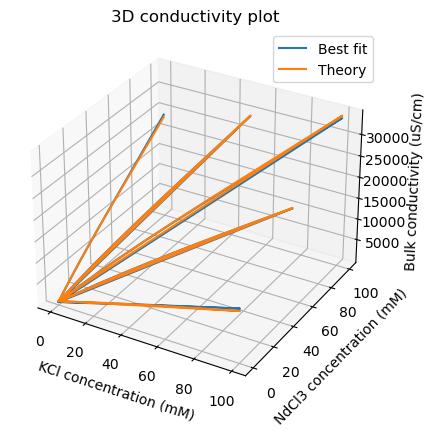

In [134]:
# evaluating predictions
cond_plot = np.matmul(beta_hat, np.transpose(X))
cond_plot2 = np.matmul(beta_hat2, np.transpose(X2))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# plotting
ax.plot3D(KCl_conc, NdCl3_conc, cond_plot, label="Best fit")
ax.plot3D(KCl_conc, NdCl3_conc, cond_plot2, label="Theory")
# ax.scatter(KCl_conc, NdCl3_conc, cond_train, label="Data")
ax.set_title('3D conductivity plot')
ax.set_zlabel("Bulk conductivity (uS/cm)")
ax.set_xlabel("KCl concentration (mM)")
ax.set_ylabel("NdCl3 concentration (mM)")
ax.legend()
plt.show()

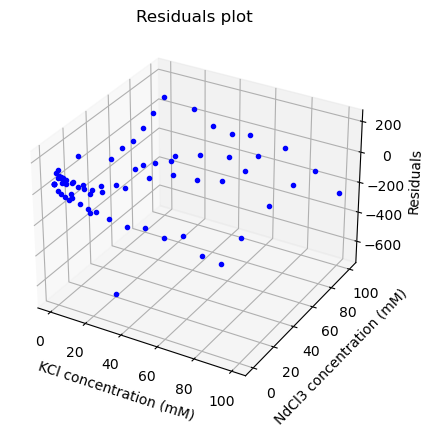

In [138]:
# calculating residuals
cond_train_pred = np.matmul(beta_hat, np.transpose(X))
e = cond_train_pred - cond_train

fig = plt.figure()
 
# syntax for 3-D projection
ax = fig.add_subplot(projection ='3d')

# plotting
ax.plot3D(KCl_conc_train, NdCl3_conc_train, e, "b.")
ax.set_title("Residuals plot")
ax.set_zlabel("Residuals")
ax.set_xlabel("KCl concentration (mM)")
ax.set_ylabel("NdCl3 concentration (mM)")
plt.show()

In [139]:
# variance of residuals
sse = sum(e[i]**2 for i in range(ndata_train))
se = sse/(ndata_train - 6)

# covariance matrix of fitted parameters
Sigma_beta = se*XXinv
print(Sigma_beta)

[[ 1.27371750e+03  1.55856460e+01  1.55856460e+01 -2.56193555e+02
  -2.56193555e+02  3.14963781e-02]
 [ 1.55856460e+01  5.25250967e+00  9.21134149e-01 -3.50922397e+01
   1.49846210e+00 -8.73355523e-03]
 [ 1.55856460e+01  9.21134149e-01  5.25250967e+00  1.49846210e+00
  -3.50922397e+01 -8.73355523e-03]
 [-2.56193555e+02 -3.50922397e+01  1.49846210e+00  2.94873863e+02
  -4.30173228e+01  2.83558688e-02]
 [-2.56193555e+02  1.49846210e+00 -3.50922397e+01 -4.30173228e+01
   2.94873863e+02  2.83558688e-02]
 [ 3.14963781e-02 -8.73355523e-03 -8.73355523e-03  2.83558688e-02
   2.83558688e-02  3.89407724e-05]]


In [140]:
var_list = [Sigma_beta[i, i] for i in range(len(Sigma_beta))]
sd_list = [np.sqrt(var_list[i]) for i in range(len(var_list))]
print(sd_list)

corr = np.zeros((len(var_list), len(var_list)))
for i in range(len(var_list)):
    for j in range(len(var_list)):
        corr[i, j] = Sigma_beta[i, j]/(sd_list[i]*sd_list[j])
print(corr)

[35.68917903209016, 2.291835436485074, 2.2918354364850586, 17.171891665892037, 17.171891665891902, 0.006240254193237069]
[[ 1.          0.19054819  0.19054819 -0.41803583 -0.41803583  0.14142356]
 [ 0.19054819  1.          0.17537029 -0.89168101  0.03807538 -0.61066828]
 [ 0.19054819  0.17537029  1.          0.03807538 -0.89168101 -0.61066828]
 [-0.41803583 -0.89168101  0.03807538  1.         -0.14588381  0.26461992]
 [-0.41803583  0.03807538 -0.89168101 -0.14588381  1.          0.26461992]
 [ 0.14142356 -0.61066828 -0.61066828  0.26461992  0.26461992  1.        ]]


In [141]:
# r squared evaluation
sse = sum(e[i]**2 for i in range(ndata_train))
cond_mean = np.mean(cond_train)
sd = [cond_train[i] - cond_mean for i in range(ndata_train)]
tss = sum(sd[i]**2 for i in range(ndata_train))
r_squared = 1 - (sse/tss)
print(f"r-squared value is: {r_squared}")

r-squared value is: 0.9998030206358192


In [ ]:
# evaluating predictions for all data

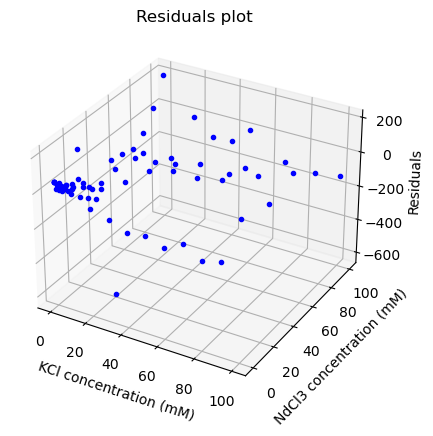

In [82]:
data = pd.read_csv("KCl&NdCl3_test.csv")
KCl_conc = data["KCl conc"]
NdCl3_conc = data["NdCl3 conc"]
cond = data["Bulk cond"]
ndata = len(cond)

KCl_conc_oh = [KCl_conc[i]**1.5 for i in range(ndata)]
NdCl3_conc_oh = [NdCl3_conc[i]**1.5 for i in range(ndata)]

KCl_conc_hf = [KCl_conc[i]**0.5 for i in range(ndata)]
NdCl3_conc_hf = [NdCl3_conc[i]**0.5 for i in range(ndata)]

KCl_conc_sq = [KCl_conc[i]**2 for i in range(ndata)]
NdCl3_conc_sq = [NdCl3_conc[i]**2 for i in range(ndata)]

sum_conc = KCl_conc + NdCl3_conc
sum_sq = [sum_conc[i]**2 for i in range(ndata)]

prdt = [KCl_conc[i]*NdCl3_conc[i] for i in range(ndata)]

X = np.ones((ndata, 8))
# X[:, 1] = KCl_conc
# X[:, 2] = NdCl3_conc
# X[:, 3] = KCl_conc_hf
# X[:, 4] = NdCl3_conc_hf
# X[:, 5] = sum_sq
# X[:, 1] = KCl_conc
# X[:, 2] = NdCl3_conc
# X[:, 3] = KCl_conc_hf
# X[:, 4] = NdCl3_conc_hf
# X[:, 5] = KCl_conc_oh
# X[:, 6] = NdCl3_conc_oh
# X[:, 7] = KCl_conc_sq
# X[:, 8] = NdCl3_conc_sq
X[:, 1] = KCl_conc
X[:, 2] = NdCl3_conc
X[:, 3] = KCl_conc_oh
X[:, 4] = NdCl3_conc_oh
X[:, 5] = KCl_conc_sq
X[:, 6] = NdCl3_conc_sq
X[:, 7] = prdt

cond_pred = np.matmul(beta_hat, np.transpose(X))

e = cond_pred - cond

fig = plt.figure()
 
# syntax for 3-D projection
ax = fig.add_subplot(projection ='3d')

# plotting
ax.plot3D(KCl_conc, NdCl3_conc, e, "b.")
ax.set_title("Residuals plot")
ax.set_zlabel("Residuals")
ax.set_xlabel("KCl concentration (mM)")
ax.set_ylabel("NdCl3 concentration (mM)")
plt.show()

In [58]:
# r squared evaluation
sse = sum(e[i]**2 for i in range(ndata))
cond_mean = np.mean(cond)
sd = [cond[i] - cond_mean for i in range(ndata)]
tss = sum(sd[i]**2 for i in range(ndata))

r_squared = 1 - (sse/tss)
print(f"r-squared value is: {r_squared}")

r-squared value is: 0.9998470156629985


In [ ]:
# All salts

In [149]:
data = pd.read_csv("All_salts.csv")
KCl_conc = data["KCl_conc"]
NdCl3_conc = data["NdCl3_conc"]
NaCl_conc = data["NaCl_conc"]
CaCl2_conc = data["CaCl2_conc"]
LaCl3_conc = data["LaCl3_conc"]
cond = data["Bulk_cond"]
ndata = len(cond)

ndata_train = ndata
cond_train = cond

KCl_conc_train = KCl_conc
NdCl3_conc_train = NdCl3_conc
NaCl_conc_train = NaCl_conc
CaCl2_conc_train = CaCl2_conc
LaCl3_conc_train = LaCl3_conc

KCl_conc_hf = [KCl_conc_train[i]**0.5 for i in range(ndata_train)]
NdCl3_conc_hf = [NdCl3_conc_train[i]**0.5 for i in range(ndata_train)]
NaCl_conc_hf = [NaCl_conc_train[i]**0.5 for i in range(ndata_train)]
CaCl2_conc_hf = [CaCl2_conc_train[i]**0.5 for i in range(ndata_train)]
LaCl3_conc_hf = [LaCl3_conc_train[i]**0.5 for i in range(ndata_train)]

KCl_conc_oh = [KCl_conc_train[i]**1.5 for i in range(ndata_train)]
NdCl3_conc_oh = [NdCl3_conc_train[i]**1.5 for i in range(ndata_train)]
NaCl_conc_oh = [NaCl_conc_train[i]**1.5 for i in range(ndata_train)]
CaCl2_conc_oh = [CaCl2_conc_train[i]**1.5 for i in range(ndata_train)]
LaCl3_conc_oh = [LaCl3_conc_train[i]**1.5 for i in range(ndata_train)]

KCl_conc_sq = [KCl_conc_train[i]**2 for i in range(ndata_train)]
NdCl3_conc_sq = [NdCl3_conc_train[i]**2 for i in range(ndata_train)]
NaCl_conc_sq = [NaCl_conc_train[i]**2 for i in range(ndata_train)]
CaCl2_conc_sq = [CaCl2_conc_train[i]**2 for i in range(ndata_train)]
LaCl3_conc_sq = [LaCl3_conc_train[i]**2 for i in range(ndata_train)]

sum_conc = KCl_conc_train + NdCl3_conc_train + NaCl_conc_train + CaCl2_conc_train + LaCl3_conc_train 
sum_sq = [sum_conc[i]**2 for i in range(ndata_train)]
prdt1 = [KCl_conc_train[i]*NdCl3_conc_train[i] for i in range(ndata_train)]
prdt5 = [NaCl_conc_train[i]*CaCl2_conc_train[i] for i in range(ndata_train)]
prdt6 = [NaCl_conc_train[i]*LaCl3_conc_train[i] for i in range(ndata_train)]
prdt9 = [CaCl2_conc_train[i]*LaCl3_conc_train[i] for i in range(ndata_train)]

In [151]:
X = np.ones((ndata_train, 21))
X[:, 1] = KCl_conc_train
X[:, 2] = NdCl3_conc_train
X[:, 3] = NaCl_conc_train
X[:, 4] = CaCl2_conc_train
X[:, 5] = LaCl3_conc_train
X[:, 6] = KCl_conc_hf
X[:, 7] = NdCl3_conc_hf
X[:, 8] = NaCl_conc_hf
X[:, 9] = CaCl2_conc_hf
X[:, 10] = LaCl3_conc_hf
X[:, 11] = KCl_conc_oh
X[:, 12] = NdCl3_conc_oh
X[:, 13] = NaCl_conc_oh
X[:, 14] = CaCl2_conc_oh
X[:, 15] = LaCl3_conc_oh
X[:, 16] = KCl_conc_sq
X[:, 17] = NdCl3_conc_sq
X[:, 18] = NaCl_conc_sq
X[:, 19] = CaCl2_conc_sq
X[:, 20] = LaCl3_conc_sq
# X[:, 1] = KCl_conc_train
# X[:, 2] = NdCl3_conc_train
# X[:, 3] = NaCl_conc_train
# X[:, 4] = CaCl2_conc_train
# X[:, 5] = KCl_conc_oh
# X[:, 6] = NdCl3_conc_oh
# X[:, 7] = NaCl_conc_oh
# X[:, 8] = CaCl2_conc_oh
# X[:, 9] = sum_sq
# X[:, 1] = KCl_conc_train
# X[:, 2] = NdCl3_conc_train
# X[:, 3] = NaCl_conc_train
# X[:, 4] = CaCl2_conc_train
# X[:, 5] = KCl_conc_hf
# X[:, 6] = NdCl3_conc_hf
# X[:, 7] = NaCl_conc_hf
# X[:, 8] = CaCl2_conc_hf
# X[:, 9] = sum_sq
# X[:, 1] = KCl_conc_train
# X[:, 2] = NdCl3_conc_train
# X[:, 3] = NaCl_conc_train
# X[:, 4] = CaCl2_conc_train
# X[:, 5] = LaCl3_conc_train
# X[:, 6] = KCl_conc_hf
# X[:, 7] = NdCl3_conc_hf
# X[:, 8] = NaCl_conc_hf
# X[:, 9] = CaCl2_conc_hf
# X[:, 10] = LaCl3_conc_hf
# X[:, 11] = sum_sq
# X[:, 1] = KCl_conc_train
# X[:, 2] = NdCl3_conc_train
# X[:, 3] = NaCl_conc_train
# X[:, 4] = CaCl2_conc_train
# X[:, 5] = LaCl3_conc_train
# X[:, 6] = KCl_conc_oh
# X[:, 7] = NdCl3_conc_oh
# X[:, 8] = NaCl_conc_oh
# X[:, 9] = CaCl2_conc_oh
# X[:, 10] = LaCl3_conc_oh
# X[:, 11] = KCl_conc_sq
# X[:, 12] = NdCl3_conc_sq
# X[:, 13] = NaCl_conc_sq
# X[:, 14] = CaCl2_conc_sq
# X[:, 15] = LaCl3_conc_sq
# X[:, 16] = prdt1
# X[:, 17] = prdt5
# X[:, 18] = prdt6
# X[:, 19] = prdt9

A = np.matmul(np.transpose(X), X)
XXinv = np.linalg.inv(A)

B = np.matmul(np.transpose(X), cond_train)
beta_hat = np.matmul(XXinv, B)
print(f'Beta hat is:{beta_hat}')

Beta hat is:[ 2.11134861e+02  1.63810833e+02  3.76089826e+02  1.69216789e+02
  1.96809942e+02  3.07340160e+02 -8.83179046e+01 -1.10833470e+02
 -1.06558237e+02 -1.15622059e+01 -2.93635494e+01 -6.42109517e+00
 -2.27188585e+01 -1.43098623e+01 -5.48448641e+00 -1.77885487e+01
  2.19731185e-01  9.66328825e-01  7.55913624e-01  2.09035189e-01
  1.43419795e+00]


In [95]:
X2 = np.ones((ndata_train, 17))
X2[:, 1] = KCl_conc_train
X2[:, 2] = NdCl3_conc_train
X2[:, 3] = NaCl_conc_train
X2[:, 4] = CaCl2_conc_train
X2[:, 5] = KCl_conc_hf
X2[:, 6] = NdCl3_conc_hf
X2[:, 7] = NaCl_conc_hf
X2[:, 8] = CaCl2_conc_hf
X2[:, 9] = KCl_conc_oh
X2[:, 10] = NdCl3_conc_oh
X2[:, 11] = NaCl_conc_oh
X2[:, 12] = CaCl2_conc_oh
X2[:, 13] = KCl_conc_sq
X2[:, 14] = NdCl3_conc_sq
X2[:, 15] = NaCl_conc_sq
X2[:, 16] = CaCl2_conc_sq

A2 = np.matmul(np.transpose(X2), X2)
XXinv2 = np.linalg.inv(A2)

B2 = np.matmul(np.transpose(X2), cond_train)
beta_hat2 = np.matmul(XXinv2, B2)
print(f'Beta hat is:{beta_hat2}')

Beta hat is:[ 2661.2672095    665.97883444   878.25782756   801.40495621
  1368.54413822 -1572.79070712 -1595.30627251 -1599.84941112
 -2279.99718641   -71.98028218   -88.27804554  -105.08256907
  -200.12924111     3.09728339     3.84388103     4.77539417
    10.03206899]


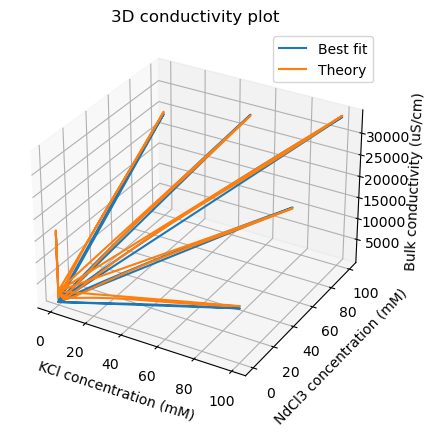

In [96]:
# evaluating predictions
cond_plot = np.matmul(beta_hat, np.transpose(X))
cond_plot2 = np.matmul(beta_hat2, np.transpose(X2))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# plotting
ax.plot3D(KCl_conc, NdCl3_conc, cond_plot, label="Best fit")
ax.plot3D(KCl_conc, NdCl3_conc, cond_plot2, label="Theory")
# ax.scatter(KCl_conc, NdCl3_conc, cond, label="Data")
ax.set_title('3D conductivity plot')
ax.set_zlabel("Bulk conductivity (uS/cm)")
ax.set_xlabel("KCl concentration (mM)")
ax.set_ylabel("NdCl3 concentration (mM)")
ax.legend()
plt.show()

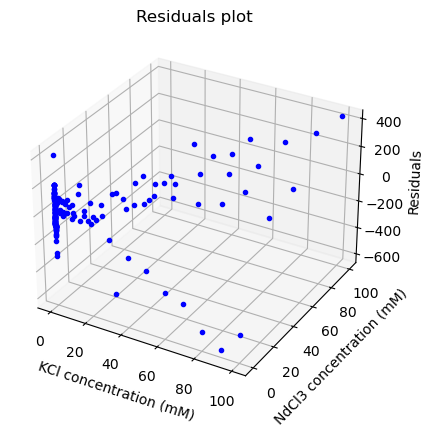

In [152]:
# calculating residuals
cond_train_pred = np.matmul(beta_hat, np.transpose(X))
e = cond_train_pred - cond_train

fig = plt.figure()
 
# syntax for 3-D projection
ax = fig.add_subplot(projection ='3d')

# plotting
ax.plot3D(KCl_conc_train, NdCl3_conc_train, e, "b.")
ax.set_title("Residuals plot")
ax.set_zlabel("Residuals")
ax.set_xlabel("KCl concentration (mM)")
ax.set_ylabel("NdCl3 concentration (mM)")
plt.show()

In [153]:
# variance of residuals
sse = sum(e[i]**2 for i in range(ndata_train))
se = sse/(ndata_train - 21)

# covariance matrix of fitted parameters
Sigma_beta = se*XXinv
print(Sigma_beta)

[[ 1.37185802e+03  2.81169790e+02  2.81169790e+02  3.81377416e+02
   3.97284617e+02  8.21318760e+02 -8.31173841e+02 -8.31173841e+02
  -9.88359577e+02 -1.00499112e+03 -1.44801002e+03 -3.67073625e+01
  -3.67073625e+01 -5.45112175e+01 -5.87239766e+01 -1.67327988e+02
   1.61117544e+00  1.61117544e+00  2.49439987e+00  2.77625630e+00
   1.07762362e+01]
 [ 2.81169790e+02  2.22748167e+03 -8.63316794e+02  7.81653836e+01
   8.14256514e+01  1.68333764e+02 -4.25772682e+03  1.75441061e+03
  -2.02569691e+02 -2.05978417e+02 -2.96777560e+02 -3.53856804e+02
   1.28520530e+02 -1.11723716e+01 -1.20357996e+01 -3.42947847e+01
   1.75110877e+01 -6.05400338e+00  5.11240873e-01  5.69008885e-01
   2.20864844e+00]
 [ 2.81169790e+02 -8.63316794e+02  2.22748167e+03  7.81653836e+01
   8.14256514e+01  1.68333764e+02  1.75441061e+03 -4.25772682e+03
  -2.02569691e+02 -2.05978417e+02 -2.96777560e+02  1.28520530e+02
  -3.53856804e+02 -1.11723716e+01 -1.20357996e+01 -3.42947847e+01
  -6.05400338e+00  1.75110877e+01  5.1

In [154]:
var_list = [Sigma_beta[i, i] for i in range(len(Sigma_beta))]

sd_list = [np.sqrt(var_list[i]) for i in range(len(var_list))]
print(sd_list)

corr = np.zeros((len(var_list), len(var_list)))
for i in range(len(var_list)):
    for j in range(len(var_list)):
        corr[i, j] = Sigma_beta[i, j]/(sd_list[i]*sd_list[j])
print(corr)

[37.03860171590762, 47.196204011822125, 47.19620401184117, 42.227758841748155, 43.240729830005854, 104.1597632052297, 93.42154876763763, 93.42154876765244, 77.35316950163762, 78.11343662110359, 134.91183472724157, 7.5998115488045945, 7.5998115488085025, 7.252786854101063, 7.554630183220009, 25.54606885478812, 0.3861828453255107, 0.3861828453257295, 0.3878037998145939, 0.4090030330445997, 1.9390091573203114]
[[ 1.          0.16084479  0.16084479  0.24383854  0.24805852  0.21289094
  -0.24020952 -0.24020952 -0.34497075 -0.34736167 -0.28977902 -0.13040546
  -0.13040546 -0.20292072 -0.2098687  -0.17684384  0.11264068  0.11264068
   0.17365985  0.18326454  0.15004885]
 [ 0.16084479  1.         -0.38757526  0.03922016  0.03989892  0.0342424
  -0.96565871  0.39790291 -0.05548675 -0.05587132 -0.04660945 -0.98654672
   0.35831304 -0.03263874 -0.03375629 -0.02844441  0.96075593 -0.33215639
   0.02793228  0.02947715  0.02413458]
 [ 0.16084479 -0.38757526  1.          0.03922016  0.03989892  0.034

In [148]:
# r squared evaluation
cond_train_mean = np.mean(cond_train)
sd = [cond_train[i] - cond_train_mean for i in range(ndata_train)]
tss = sum(sd[i]**2 for i in range(ndata_train))

r_squared = 1 - (sse/tss)
print(f"r-squared value is: {r_squared}")

r-squared value is: 0.9994536122545394


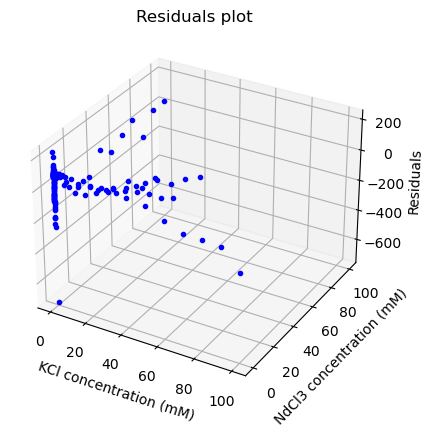

In [24]:
# model validation with new data
test_data = pd.read_csv("Test_data.csv")
NaCl_conc = test_data["NaCl_conc"]
CaCl2_conc = test_data["CaCl2_conc"]
KCl_conc = test_data["KCl_conc"]
NdCl3_conc = test_data["NdCl3_conc"]
test_cond = test_data["Cond"]


ndata = len(test_cond)
LaCl3_conc = [0 for i in range(ndata)]
# KCl_conc = np.zeros(ndata)
# NdCl3_conc = np.zeros(ndata)

NaCl_conc_oh = [NaCl_conc[i]**1.5 for i in range(ndata)]
CaCl2_conc_oh = [CaCl2_conc[i]**1.5 for i in range(ndata)]
KCl_conc_oh = [KCl_conc[i]**1.5 for i in range(ndata)]
NdCl3_conc_oh = [NdCl3_conc[i]**1.5 for i in range(ndata)]


NaCl_conc_hf = [NaCl_conc[i]**0.5 for i in range(ndata)]
CaCl2_conc_hf = [CaCl2_conc[i]**0.5 for i in range(ndata)]
KCl_conc_hf = [KCl_conc[i]**0.5 for i in range(ndata)]
NdCl3_conc_hf = [NdCl3_conc[i]**0.5 for i in range(ndata)]
LaCl3_conc_hf = LaCl3_conc

NaCl_conc_sq = [NaCl_conc[i]**2 for i in range(ndata)]
CaCl2_conc_sq = [CaCl2_conc[i]**2 for i in range(ndata)]
KCl_conc_sq = [KCl_conc[i]**2 for i in range(ndata)]
NdCl3_conc_sq = [NdCl3_conc[i]**2 for i in range(ndata)]

# KCl_conc_oh = KCl_conc
# NdCl3_conc_oh = NdCl3_conc

# KCl_conc_hf = KCl_conc
# NdCl3_conc_hf = NdCl3_conc

# KCl_conc_sq = KCl_conc
# NdCl3_conc_sq = NdCl3_conc

sum_conc = NaCl_conc + CaCl2_conc + KCl_conc + NdCl3_conc + LaCl3_conc
sum_sq = [sum_conc[i]**2 for i in range(ndata)]

X = np.ones((ndata, 12))
# X[:, 1] = KCl_conc
# X[:, 2] = NdCl3_conc
# X[:, 3] = NaCl_conc
# X[:, 4] = CaCl2_conc
# X[:, 5] = KCl_conc_hf
# X[:, 6] = NdCl3_conc_hf
# X[:, 7] = NaCl_conc_hf
# X[:, 8] = CaCl2_conc_hf
# X[:, 9] = KCl_conc_oh
# X[:, 10] = NdCl3_conc_oh
# X[:, 11] = NaCl_conc_oh
# X[:, 12] = CaCl2_conc_oh
# X[:, 13] = KCl_conc_sq
# X[:, 14] = NdCl3_conc_sq
# X[:, 15] = NaCl_conc_sq
# X[:, 16] = CaCl2_conc_sq
# X[:, 1] = KCl_conc
# X[:, 2] = NdCl3_conc
# X[:, 3] = NaCl_conc
# X[:, 4] = CaCl2_conc
# X[:, 5] = KCl_conc_oh
# X[:, 6] = NdCl3_conc_oh
# X[:, 7] = NaCl_conc_oh
# X[:, 8] = CaCl2_conc_oh
# X[:, 9] = sum_sq
X[:, 1] = KCl_conc
X[:, 2] = NdCl3_conc
X[:, 3] = NaCl_conc
X[:, 4] = CaCl2_conc
X[:, 5] = LaCl3_conc
X[:, 6] = KCl_conc_hf
X[:, 7] = NdCl3_conc_hf
X[:, 8] = NaCl_conc_hf
X[:, 9] = CaCl2_conc_hf
X[:, 10] = LaCl3_conc_hf
X[:, 11] = sum_sq

cond_pred = np.matmul(beta_hat, np.transpose(X))
e = cond_pred - test_cond

# plotting residuals
fig = plt.figure()
 
# syntax for 3-D projection
ax = fig.add_subplot(projection ='3d')

# plotting
ax.plot3D(NaCl_conc, CaCl2_conc, e, "b.")
ax.set_title("Residuals plot")
ax.set_zlabel("Residuals")
ax.set_xlabel("KCl concentration (mM)")
ax.set_ylabel("NdCl3 concentration (mM)")
plt.show()

In [12]:
# r squared evaluation
sse = sum(e[i]**2 for i in range(ndata))
test_cond_mean = np.mean(test_cond)
sd = [test_cond[i] - test_cond_mean for i in range(ndata)]
tss = sum(sd[i]**2 for i in range(ndata))

r_squared = 1 - (sse/tss)
print(f"r-squared value is: {r_squared}")

r-squared value is: 0.9997777062100799
